In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
movie_data = pd.read_csv("C:\\Users\\Akshata\\Downloads\\movies.dat", sep = "::", header = None,names = ["MovieID","Title","Genres"], engine = "python",encoding = "latin-1")

In [3]:
movie_data.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
movie_data.shape

(3883, 3)

In [5]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   int64 
 1   Title    3883 non-null   object
 2   Genres   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [6]:
movie_data.isnull().sum()

MovieID    0
Title      0
Genres     0
dtype: int64

In [7]:
ratings_data = pd.read_csv("C:\\Users\\Akshata\\Downloads\\ratings.dat", sep = "::",names = ["UserID","MovieID","Rating","Timestamp"], engine = "python")

In [8]:
ratings_data.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [9]:
ratings_data.shape

(1000209, 4)

In [10]:
ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   UserID     1000209 non-null  int64
 1   MovieID    1000209 non-null  int64
 2   Rating     1000209 non-null  int64
 3   Timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [11]:
ratings_data.isnull().sum()

UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64

In [12]:
users_data = pd.read_csv("C:\\Users\\Akshata\\Downloads\\users.dat", sep = "::", engine = "python", names = ["UserID","Gender","Age","Occupation","Zip-code"])

In [13]:
users_data.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [14]:
users_data.shape

(6040, 5)

In [15]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [16]:
users_data.isnull().sum()

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

# Merging the dataset

In [17]:
movies_ratings = pd.merge(movie_data,ratings_data, on = "MovieID",how = "inner")
movies_ratings

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474
...,...,...,...,...,...,...
1000204,3952,"Contender, The (2000)",Drama|Thriller,5812,4,992072099
1000205,3952,"Contender, The (2000)",Drama|Thriller,5831,3,986223125
1000206,3952,"Contender, The (2000)",Drama|Thriller,5837,4,1011902656
1000207,3952,"Contender, The (2000)",Drama|Thriller,5927,1,979852537


In [18]:
users_ratings = pd.merge(users_data,ratings_data,on="UserID",how = "inner")
users_ratings

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp
0,1,F,1,10,48067,1193,5,978300760
1,1,F,1,10,48067,661,3,978302109
2,1,F,1,10,48067,914,3,978301968
3,1,F,1,10,48067,3408,4,978300275
4,1,F,1,10,48067,2355,5,978824291
...,...,...,...,...,...,...,...,...
1000204,6040,M,25,6,11106,1091,1,956716541
1000205,6040,M,25,6,11106,1094,5,956704887
1000206,6040,M,25,6,11106,562,5,956704746
1000207,6040,M,25,6,11106,1096,4,956715648


In [19]:
users_movie_ratings = pd.merge(users_data,movies_ratings,on="UserID",how = "inner")
users_movie_ratings

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Title,Genres,Rating,Timestamp
0,1,F,1,10,48067,1,Toy Story (1995),Animation|Children's|Comedy,5,978824268
1,1,F,1,10,48067,48,Pocahontas (1995),Animation|Children's|Musical|Romance,5,978824351
2,1,F,1,10,48067,150,Apollo 13 (1995),Drama,5,978301777
3,1,F,1,10,48067,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,4,978300760
4,1,F,1,10,48067,527,Schindler's List (1993),Drama|War,5,978824195
...,...,...,...,...,...,...,...,...,...,...
1000204,6040,M,25,6,11106,3683,Blood Simple (1984),Drama|Film-Noir,4,960971696
1000205,6040,M,25,6,11106,3703,Mad Max 2 (a.k.a. The Road Warrior) (1981),Action|Sci-Fi,4,964828575
1000206,6040,M,25,6,11106,3735,Serpico (1973),Crime|Drama,4,960971654
1000207,6040,M,25,6,11106,3751,Chicken Run (2000),Animation|Children's|Comedy,4,964828782


# Exploratory Data Analysis

In [20]:
users_movie_ratings.head()

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Title,Genres,Rating,Timestamp
0,1,F,1,10,48067,1,Toy Story (1995),Animation|Children's|Comedy,5,978824268
1,1,F,1,10,48067,48,Pocahontas (1995),Animation|Children's|Musical|Romance,5,978824351
2,1,F,1,10,48067,150,Apollo 13 (1995),Drama,5,978301777
3,1,F,1,10,48067,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,4,978300760
4,1,F,1,10,48067,527,Schindler's List (1993),Drama|War,5,978824195


In [21]:
users_movie_ratings.shape

(1000209, 10)

In [22]:
users_movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   UserID      1000209 non-null  int64 
 1   Gender      1000209 non-null  object
 2   Age         1000209 non-null  int64 
 3   Occupation  1000209 non-null  int64 
 4   Zip-code    1000209 non-null  object
 5   MovieID     1000209 non-null  int64 
 6   Title       1000209 non-null  object
 7   Genres      1000209 non-null  object
 8   Rating      1000209 non-null  int64 
 9   Timestamp   1000209 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 76.3+ MB


In [23]:
users_movie_ratings.isna().sum()

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
MovieID       0
Title         0
Genres        0
Rating        0
Timestamp     0
dtype: int64

In [24]:
users_movie_ratings.drop(columns = ["Zip-code","Timestamp"],axis =1,inplace=True)

In [25]:
users_movie_ratings

,UserID,Gender,Age,Occupation,MovieID,Title,Genres,Rating
0,1,F,1,10,1,Toy Story (1995),Animation|Children's|Comedy,5
1,1,F,1,10,48,Pocahontas (1995),Animation|Children's|Musical|Romance,5
2,1,F,1,10,150,Apollo 13 (1995),Drama,5
3,1,F,1,10,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,4
4,1,F,1,10,527,Schindler's List (1993),Drama|War,5
...,...,...,...,...,...,...,...,...
1000204,6040,M,25,6,3683,Blood Simple (1984),Drama|Film-Noir,4
1000205,6040,M,25,6,3703,Mad Max 2 (a.k.a. The Road Warrior) (1981),Action|Sci-Fi,4
1000206,6040,M,25,6,3735,Serpico (1973),Crime|Drama,4
1000207,6040,M,25,6,3751,Chicken Run (2000),Animation|Children's|Comedy,4


# Univariant Analysis

Gender
M    753769
F    246440
Name: count, dtype: int64

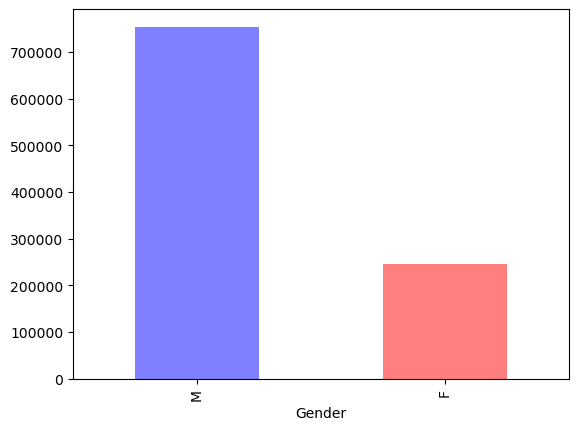

In [26]:
users_movie_ratings.Gender.value_counts().plot(kind = "bar",color = ["Blue","Red"],alpha = 0.5)
users_movie_ratings.Gender.value_counts()

Age
25    395556
35    199003
18    183536
45     83633
50     72490
56     38780
1      27211
Name: count, dtype: int64

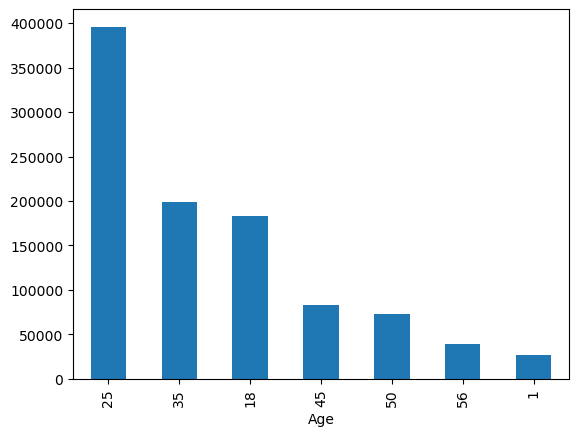

In [27]:
users_movie_ratings.Age.value_counts().plot(kind = "bar")
users_movie_ratings.Age.value_counts()

Occupation
4     131032
0     130499
7     105425
1      85351
17     72816
20     60397
12     57214
2      50068
14     49109
16     46021
6      37205
3      31623
10     23290
15     22951
5      21850
11     20563
19     14904
13     13754
18     12086
9      11345
8       2706
Name: count, dtype: int64

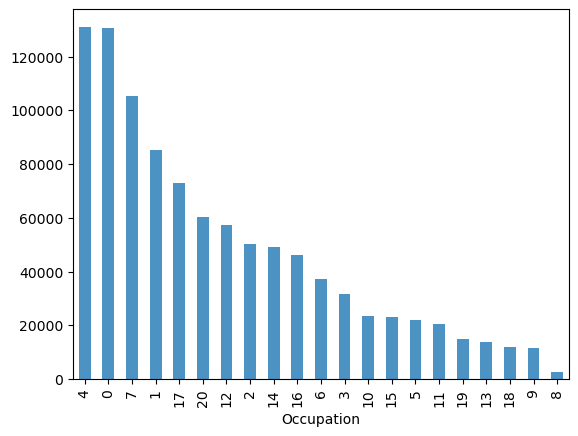

In [28]:
users_movie_ratings["Occupation"].value_counts().plot(kind = "bar", alpha = 0.8)
users_movie_ratings["Occupation"].value_counts()

Rating
4    348971
3    261197
5    226310
2    107557
1     56174
Name: count, dtype: int64

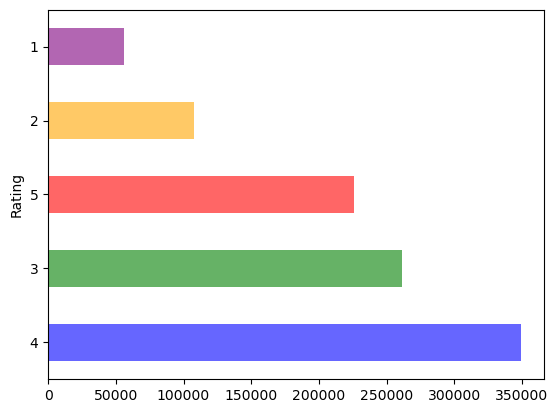

In [29]:
users_movie_ratings["Rating"].value_counts().plot(kind = "barh", color = ["blue","green","red","orange","purple"], alpha =  0.6)
users_movie_ratings["Rating"].value_counts()

# Bivariate Analysis

Gender  Rating
F       4          87033
        3          62966
        5          58546
        2          24548
        1          13347
M       4         261938
        3         198231
        5         167764
        2          83009
        1          42827
Name: count, dtype: int64

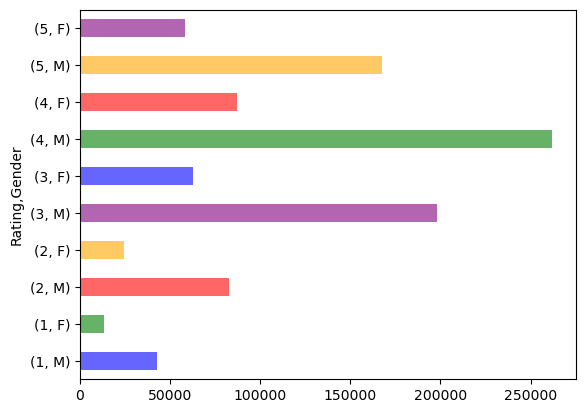

In [30]:
users_movie_ratings.groupby("Rating")["Gender"].value_counts().plot(kind = "barh", color = ["blue","green","red","orange","purple"], alpha =  0.6)
users_movie_ratings.groupby("Gender")["Rating"].value_counts()

Gender,F,M
Rating,,
1,13347,42827
2,24548,83009
3,62966,198231
4,87033,261938
5,58546,167764


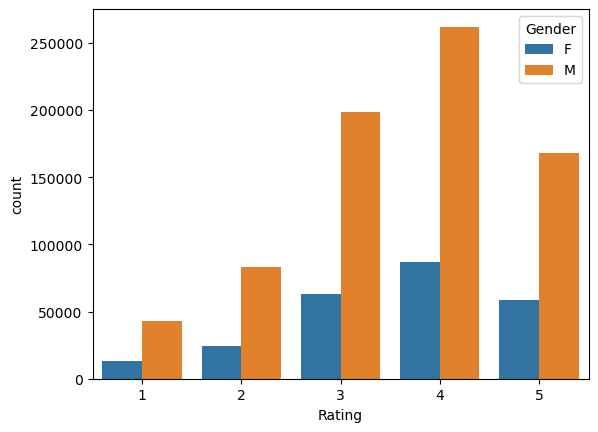

In [31]:
sns.countplot(x="Rating",hue = "Gender",data = users_movie_ratings)
pd.crosstab(users_movie_ratings["Rating"],users_movie_ratings["Gender"])

Gender  Age
F       25      91340
        35      49473
        18      45427
        45      24110
        50      18064
        56       9199
        1        8827
M       25     304216
        35     149530
        18     138109
        45      59523
        50      54426
        56      29581
        1       18384
Name: count, dtype: int64

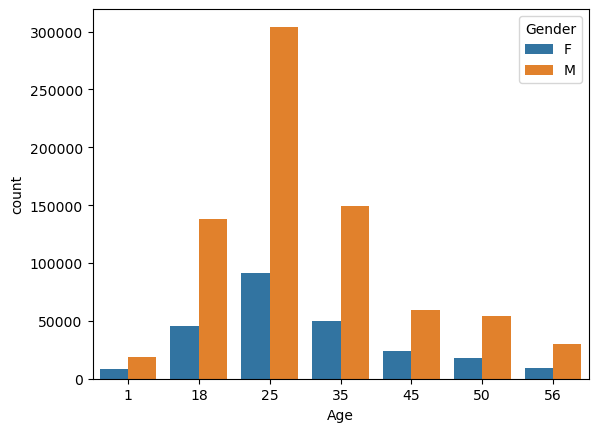

In [32]:
sns.countplot(x="Age", hue="Gender", data= users_movie_ratings)
users_movie_ratings.groupby("Gender")["Age"].value_counts()

In [33]:
users_movie_ratings.Genres.unique()

array(["Animation|Children's|Comedy",
       "Animation|Children's|Musical|Romance", 'Drama',
       'Action|Adventure|Fantasy|Sci-Fi', 'Drama|War', "Children's|Drama",
       "Animation|Children's|Comedy|Musical",
       "Animation|Children's|Musical", 'Crime|Drama|Thriller',
       'Animation', 'Animation|Comedy|Thriller', 'Musical|Romance',
       "Adventure|Children's|Drama|Musical", 'Musical',
       "Children's|Comedy|Musical", "Children's|Drama|Fantasy|Sci-Fi",
       'Action|Adventure|Comedy|Romance', 'Comedy|Sci-Fi',
       'Action|Adventure|Drama',
       "Adventure|Animation|Children's|Comedy|Musical", 'Drama|Romance',
       "Animation|Children's", 'Action|Drama|War', 'Comedy', 'Romance',
       'Action|Crime|Romance', 'Thriller', 'Comedy|Fantasy',
       'Comedy|Drama', 'Action|Comedy|Drama', 'Action|Thriller',
       'Action|Romance|Thriller', 'Action|Drama|Thriller',
       'Action|Adventure|Thriller', 'Comedy|Romance|War',
       'Action|Comedy|Western', 'Action|Adventu

# Encoding

In [37]:
users_movie_ratings.Animation.sum()

43293

In [38]:
users_movie_ratings.Animation.value_counts()

Animation
0    956916
1     43293
Name: count, dtype: int64

In [39]:
# Calculate the sum for each column
Genres_sum = users_movie_ratings.iloc[:,7:].sum()

# Create a new DataFrame or Series with column names and their sums
Genres_sum_table = pd.DataFrame({"Genre": Genres_sum.index, "Total_Genre_movies" :Genres_sum.values})

# Display the sums DataFrame
Genres_sum_table.sort_values(by = "Total_Genre_movies", ascending = False, inplace = True)

Genres_sum_table


,Genre,Total_Genre_movies
4,Comedy,356580
7,Drama,354529
0,Action,257457
15,Thriller,189680
14,Sci-Fi,157294
13,Romance,147523
1,Adventure,133953
5,Crime,79541
10,Horror,76386
3,Children's,72186


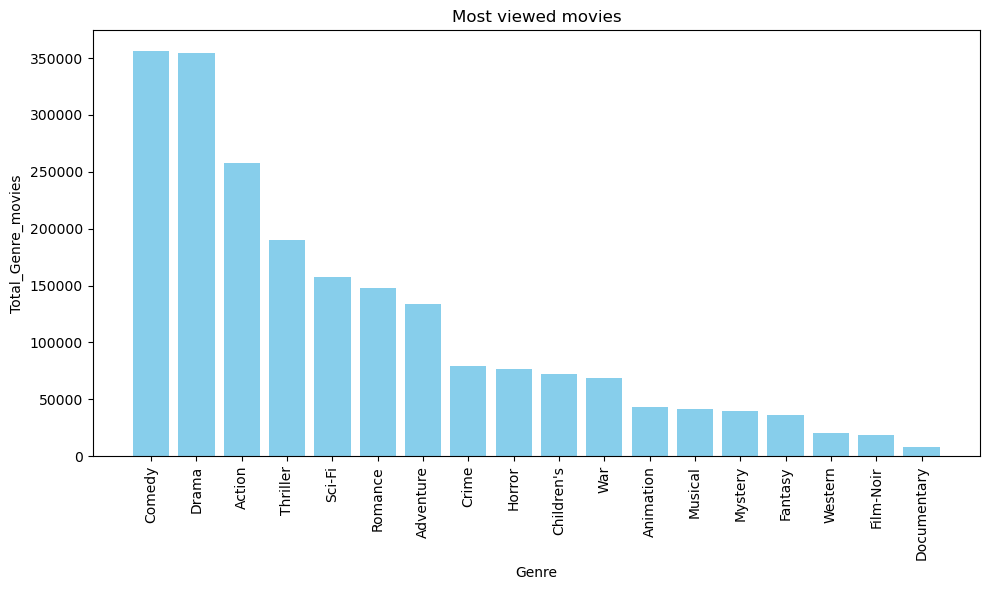

In [41]:
plt.figure(figsize=(10, 6))
plt.bar(Genres_sum_table['Genre'], Genres_sum_table['Total_Genre_movies'], color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Total_Genre_movies')
plt.title('Most viewed movies')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Encoding

In [42]:
u_m_r_encoded = pd.get_dummies(users_movie_ratings, columns = ["Age","Occupation"])
u_m_r_encoded

,UserID,Gender,MovieID,Title,Rating,Action,Adventure,Animation,Children's,Comedy,...,Occupation_11,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20
0,1,F,1,Toy Story (1995),5,0,0,1,1,1,...,False,False,False,False,False,False,False,False,False,False
1,1,F,48,Pocahontas (1995),5,0,0,1,1,0,...,False,False,False,False,False,False,False,False,False,False
2,1,F,150,Apollo 13 (1995),5,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,1,F,260,Star Wars: Episode IV - A New Hope (1977),4,1,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,1,F,527,Schindler's List (1993),5,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,6040,M,3683,Blood Simple (1984),4,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1000205,6040,M,3703,Mad Max 2 (a.k.a. The Road Warrior) (1981),4,1,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1000206,6040,M,3735,Serpico (1973),4,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1000207,6040,M,3751,Chicken Run (2000),4,0,0,1,1,1,...,False,False,False,False,False,False,False,False,False,False


In [43]:
# Encoding the Gender variables, Female -0 , Male-1
u_m_r_encoded.Gender.replace({"F":0,"M":1},inplace=True)
u_m_r_encoded

,UserID,Gender,MovieID,Title,Rating,Action,Adventure,Animation,Children's,Comedy,...,Occupation_11,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20
0,1,0,1,Toy Story (1995),5,0,0,1,1,1,...,False,False,False,False,False,False,False,False,False,False
1,1,0,48,Pocahontas (1995),5,0,0,1,1,0,...,False,False,False,False,False,False,False,False,False,False
2,1,0,150,Apollo 13 (1995),5,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,1,0,260,Star Wars: Episode IV - A New Hope (1977),4,1,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,1,0,527,Schindler's List (1993),5,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1,3683,Blood Simple (1984),4,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1000205,6040,1,3703,Mad Max 2 (a.k.a. The Road Warrior) (1981),4,1,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1000206,6040,1,3735,Serpico (1973),4,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1000207,6040,1,3751,Chicken Run (2000),4,0,0,1,1,1,...,False,False,False,False,False,False,False,False,False,False


In [41]:
u_m_r_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 51 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   UserID         1000209 non-null  int64 
 1   Gender         1000209 non-null  int64 
 2   MovieID        1000209 non-null  int64 
 3   Title          1000209 non-null  object
 4   Rating         1000209 non-null  int64 
 5   Action         1000209 non-null  int64 
 6   Adventure      1000209 non-null  int64 
 7   Animation      1000209 non-null  int64 
 8   Children's     1000209 non-null  int64 
 9   Comedy         1000209 non-null  int64 
 10  Crime          1000209 non-null  int64 
 11  Documentary    1000209 non-null  int64 
 12  Drama          1000209 non-null  int64 
 13  Fantasy        1000209 non-null  int64 
 14  Film-Noir      1000209 non-null  int64 
 15  Horror         1000209 non-null  int64 
 16  Musical        1000209 non-null  int64 
 17  Mystery        1000209 non-

# Separating the features and target

In [44]:
X = u_m_r_encoded.drop(columns=["Title","Rating"],axis=1) 
Y = u_m_r_encoded["Rating"]

In [45]:
X.shape,Y.shape

((1000209, 49), (1000209,))

# Train_Test_Split

In [46]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(700146, 49) (700146,) (300063, 49) (300063,)


# Model Training

# Decision Tree

In [47]:
model_dec = DecisionTreeClassifier(class_weight = "balanced",random_state = 42)

In [48]:
model_dec.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

# Model Evaluation

In [49]:
# Prediction on train
train_preds_dec = model_dec.predict(X_train)

In [50]:
# Prediction on test
test_preds_dec = model_dec.predict(X_test)

In [51]:
# print Classification report of train_data
print(classification_report(Y_train,train_preds_dec))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     39270
           2       1.00      1.00      1.00     75283
           3       1.00      1.00      1.00    182852
           4       1.00      1.00      1.00    244420
           5       1.00      1.00      1.00    158321

    accuracy                           1.00    700146
   macro avg       1.00      1.00      1.00    700146
weighted avg       1.00      1.00      1.00    700146



In [52]:
# print Classification report of test_data
print(classification_report(Y_test,test_preds_dec))

              precision    recall  f1-score   support

           1       0.19      0.21      0.20     16904
           2       0.18      0.19      0.18     32274
           3       0.30      0.30      0.30     78345
           4       0.38      0.37      0.38    104551
           5       0.35      0.36      0.35     67989

    accuracy                           0.32    300063
   macro avg       0.28      0.28      0.28    300063
weighted avg       0.32      0.32      0.32    300063

